# **Hand Written Bengali Number Regongnition**

Our Approach
1. Build a digit(0-9) classifier using a CNN architecture.
2. Apply character segmentation for the handwritten number image.
3. Classify each segmented digit and then get the final number in the image.

In [ ]:
# !pip install imutils
# pip install numpy
# !pip install pandas
# !pip install keras
# !pip install tensorflow
# !pip install opencv-python
# !pip install matplotlib
# !pip install sklearn
# !pip install seaborn

In [4]:
import numpy as np
import pandas as pd
from keras.preprocessing.image import ImageDataGenerator
import os
import random 
import cv2
import imutils
import random
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelBinarizer
from keras.utils import np_utils
from keras.models import Sequential
from keras import optimizers
from sklearn.preprocessing import LabelBinarizer
from keras import backend as K
from keras.layers import Dense, Activation, Flatten, Dense,MaxPooling2D, Dropout
from keras.layers import Conv2D, MaxPooling2D, BatchNormalization

In [24]:
dir = "D:\\4th_year_1st_semester\\AI-ML-LAB\Handwritten-Bangla-Number-Recognition-OCR\\Dataset"
train_data = []
val_data = []
img_size = 32
for i in os.listdir(dir):
    sub_directory = os.path.join(dir,i)
    counter=0
    for j in os.listdir(sub_directory):
        if counter%5!=0:
            img = cv2.imread(os.path.join(sub_directory,j),0)
            img = cv2.resize(img,(img_size,img_size))
            train_data.append([img,i])
        else:
            img = cv2.imread(os.path.join(sub_directory,j),0)
            img = cv2.resize(img,(img_size,img_size))
            val_data.append([img,i])
        counter=counter+1

print("Number of Training Data : ",len(train_data))
print("Number of validation Data : ",len(val_data))

Number of Training Data :  12494
Number of validation Data :  3128


In [25]:
random.shuffle(train_data)
random.shuffle(val_data)

In [26]:
train_X = []
train_Y = []
for features,label in train_data:
    train_X.append(features)
    train_Y.append(label)

In [27]:
val_X = []
val_Y = []
for features,label in val_data:
    val_X.append(features)
    val_Y.append(label)

In [28]:
LB = LabelBinarizer()
train_Y = LB.fit_transform(train_Y)
val_Y = LB.fit_transform(val_Y)

In [29]:
train_X = np.array(train_X)/255.0
train_X = train_X.reshape(-1,32,32,1)
train_Y = np.array(train_Y)

In [30]:
val_X = np.array(val_X)/255.0
val_X = val_X.reshape(-1,32,32,1)
val_Y = np.array(val_Y)

In [31]:
print("Training dataset shape",train_X.shape,val_X.shape)
print("Training dataset shape",train_Y.shape,val_Y.shape)

Training dataset shape (12494, 32, 32, 1) (3128, 32, 32, 1)
Training dataset shape (12494, 10) (3128, 10)


In [32]:
model = Sequential()

model.add(Conv2D(32, (3, 3), padding = "same", activation='relu', input_shape=(32,32,1)))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))
 
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(10, activation='softmax'))

In [33]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 32, 32, 32)        320       
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 16, 16, 32)       0         
 2D)                                                             
                                                                 
 conv2d_4 (Conv2D)           (None, 14, 14, 64)        18496     
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 7, 7, 64)         0         
 2D)                                                             
                                                                 
 conv2d_5 (Conv2D)           (None, 5, 5, 128)         73856     
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 2, 2, 128)       

In [34]:
model.compile(loss='categorical_crossentropy', optimizer="adam",metrics=['accuracy'])

In [35]:
history = model.fit(train_X,train_Y, epochs=50, batch_size=32, validation_data = (val_X, val_Y),  verbose=1)

Epoch 1/50
391/391 [==============================] - 16s 39ms/step - loss: 0.6389 - accuracy: 0.7849 - val_loss: 0.3103 - val_accuracy: 0.8910
Epoch 2/50
391/391 [==============================] - 15s 40ms/step - loss: 0.3035 - accuracy: 0.8976 - val_loss: 0.2159 - val_accuracy: 0.9226
Epoch 3/50
391/391 [==============================] - 16s 42ms/step - loss: 0.2258 - accuracy: 0.9215 - val_loss: 0.1865 - val_accuracy: 0.9373
Epoch 4/50
391/391 [==============================] - 16s 41ms/step - loss: 0.1790 - accuracy: 0.9389 - val_loss: 0.1492 - val_accuracy: 0.9511
Epoch 5/50
391/391 [==============================] - 15s 39ms/step - loss: 0.1427 - accuracy: 0.9513 - val_loss: 0.1295 - val_accuracy: 0.9536
Epoch 6/50
391/391 [==============================] - 15s 40ms/step - loss: 0.1167 - accuracy: 0.9580 - val_loss: 0.1294 - val_accuracy: 0.9559
Epoch 7/50
391/391 [==============================] - 16s 40ms/step - loss: 0.1019 - accuracy: 0.9641 - val_loss: 0.1092 - val_accuracy:

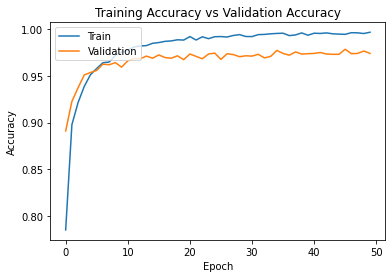

In [36]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Training Accuracy vs Validation Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

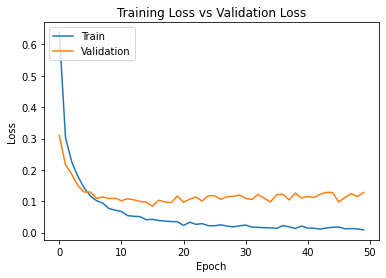

In [37]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Training Loss vs Validation Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

In [38]:
def sort_contours(cnts, method="left-to-right"):
    reverse = False
    i = 0
    if method == "right-to-left" or method == "bottom-to-top":
        reverse = True
    if method == "top-to-bottom" or method == "bottom-to-top":
        i = 1
    boundingBoxes = [cv2.boundingRect(c) for c in cnts]
    (cnts, boundingBoxes) = zip(*sorted(zip(cnts, boundingBoxes),
    key=lambda b:b[1][i], reverse=reverse))
    # return the list of sorted contours and bounding boxes
    return (cnts, boundingBoxes)

In [39]:
def get_degits(img):
    digits = []
    image = cv2.imread(img)
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    ret,thresh1 = cv2.threshold(gray ,127,255,cv2.THRESH_BINARY_INV)
    dilated = cv2.dilate(thresh1, None, iterations=2)

    cnts = cv2.findContours(dilated.copy(), cv2.RETR_EXTERNAL,cv2.CHAIN_APPROX_SIMPLE)
    cnts = imutils.grab_contours(cnts)
    cnts = sort_contours(cnts, method="left-to-right")[0]
    # loop over the contours
    for c in cnts:
        if cv2.contourArea(c) > 10:
            (x, y, w, h) = cv2.boundingRect(c)
            cv2.rectangle(image, (x, y), (x + w, y + h), (0, 255, 0), 2)
        roi = gray[y:y + h, x:x + w]
        thresh = cv2.threshold(roi, 0, 255,cv2.THRESH_BINARY_INV | cv2.THRESH_OTSU)[1]
        thresh = cv2.resize(thresh, (32, 32), interpolation = cv2.INTER_CUBIC)
        thresh = thresh.astype("float32") / 255.0
        thresh = np.expand_dims(thresh, axis=-1)
        thresh = thresh.reshape(1,32,32,1)
        ypred = model.predict(thresh)
        ypred = LB.inverse_transform(ypred)
        [x] = ypred
        digits.append(x)
    return digits, image


In [40]:
def get_number(digit):
    number = "".join(digit)
    return number

1/1 [==============================] - 0s 42ms/step
2017331091


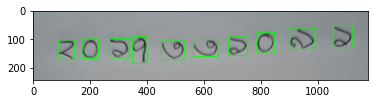

In [41]:
digit,image = get_degits("D:\\4th_year_1st_semester\\AI-ML-LAB\\Handwritten-Bangla-Number-Recognition-OCR\\evaluation\\2017331091.jpeg")
number = get_number(digit)
print(number)
plt.imshow(image)

1/1 [==============================] - 0s 28ms/step
2017331024


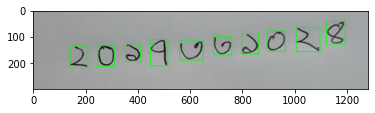

In [42]:
digit,image = get_degits("D:\\4th_year_1st_semester\\AI-ML-LAB\\Handwritten-Bangla-Number-Recognition-OCR\\evaluation\\2017331024.jpeg")
number = get_number(digit)
print(number)
plt.imshow(image)

In [43]:
digit,image = get_degits("D:\\4th_year_1st_semester\\AI-ML-LAB\\Handwritten-Bangla-Number-Recognition-OCR\\evaluation\\2019331012_1.jpeg")
number = get_number(digit)
print(number)
plt.imshow(image)

1/1 [==============================] - 0s 31ms/step


TypeError: can only concatenate str (not "int") to str

1/1 [==============================] - 0s 23ms/step
6000444882082295082369840284090


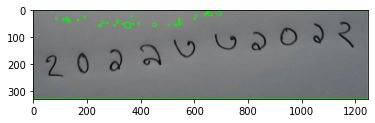

In [45]:
digit,image = get_degits("D:\\4th_year_1st_semester\\AI-ML-LAB\\Handwritten-Bangla-Number-Recognition-OCR\\evaluation\\2019331012_2.jpeg")
number = get_number(digit)
print(number)
plt.imshow(image)